In [11]:
pip install gym_bandits

Note: you may need to restart the kernel to use updated packages.


In [19]:
import gym
import gym_bandits
import numpy as np
import matplotlib.pyplot as plt

In [13]:
env = gym.make('MultiarmedBandits-v0')

In [14]:
print(env.action_space)

Discrete(10)


In [15]:
print(env.observation_space)

Discrete(1)


Estimated Q-values for each arm: [-0.31 -0.15 -0.03 -0.45 -0.26 -0.04 -0.31 -0.13 -0.15 -0.94]
Number of times each arm was selected: [  4   8 381   2   6   7  17  64   6   5]
Average reward over all episodes: -0.07


C:\Users\hp\AppData\Local\Temp\ipykernel_24320\3533517593.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  reward_sums[action] += reward


Text(0, 0.5, 'Times Selected')

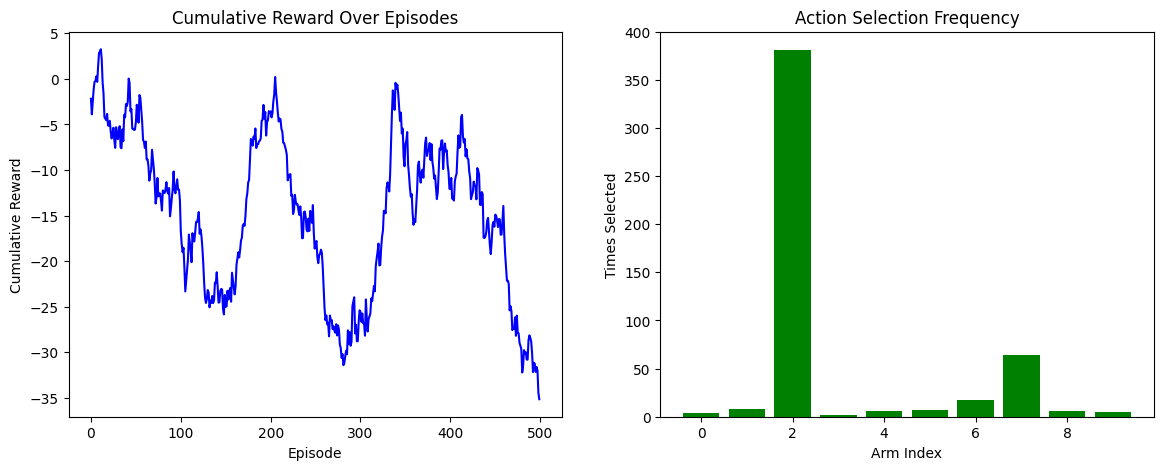

In [20]:
n_arms = env.action_space.n
num_episodes = 500
epsilon = 0.1
q_values = np.zeros(n_arms)
counts = np.zeros(n_arms)
reward_sums = np.zeros(n_arms)

all_rewards = []
action_history = []
for episode in range(num_episodes):
    env.reset()
    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(q_values)
    observation, reward, done, info = env.step(action)
    counts[action] += 1
    reward_sums[action] += reward
    q_values[action] = reward_sums[action] / counts[action]
    all_rewards.append(reward)
    action_history.append(action)
env.close()

print("Estimated Q-values for each arm:", np.round(q_values, 2))
print("Number of times each arm was selected:", counts.astype(int))
print("Average reward over all episodes:", round(np.mean(all_rewards), 3))
plt.figure(figsize = (14, 5))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(all_rewards), color='blue')
plt.title("Cumulative Reward Over Episodes")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")

plt.subplot(1, 2, 2)
plt.bar(np.arange(n_arms), counts, color='green')
plt.title("Action Selection Frequency")
plt.xlabel("Arm Index")
plt.ylabel("Times Selected")